# Exercise Sheet 8: Optimization for Training Deep Models (Deadline: 06 Jan, 23:59)






















































For theoretical tasks you are encouraged to write in $\LaTeX$. Jupyter notebooks support them by default. For reference, please have a look at the examples in this short excellent guide: [Typesetting Equations](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Typesetting%20Equations.ipynb)

Alternatively, you can upload the solutions in the written form as images and paste them inside the cells. But if you do this, **make sure** that the images are of high quality, so that we can read them without any problems.

### 0) Preamble : Understanding Gradient Signals of Activation functions (2.5 points)

In Assignment-5, we saw the importance of **activation functions** in action for achieving **non-linear** decision boundary. Because of this functionality/behaviour, these functions are sometimes called simply as **non-linearities** in Deep Learning literature. In this task, we will understand the gradient signals of three different non-linearities: *Sigmoid*, *Tanh*, and *ReLU*. 

(Find more information at: [Comparison_of_activation_functions](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions))

In [1]:
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

**i**) Implement the activation functions *Sigmoid*, *Tanh*, and *ReLU* and their gradient computation using only basic ops in TensorFlow (**1.5 point**)

(No need to derive the gradient expression, just use it as is (see the link above for help); You can use TensorFlow for stable implementations of $sigmoid$ and $tanh$ calculations. However, you **should do** the gradient computation yourself using *only* the basic ops such as `tf.nn.<activation_function>`, `tf.subtract`, `tf.square` etc.)

Unlike $\color{blue}{NumPy}$, TensorFlow doesn't have support for `float128` as of 2017. So, we will just stick to `tf.float64`.

In [2]:
# can be used to call .eval() on tensors
isess = tf.InteractiveSession()

# TODO: implement activation functions & their gradient computations

def sigmoid(x):
    """
    x: numpy array with the range of input values for our plot.
       should be `upcast`ed to float64, before taking sigmoid
    """
    x_s = tf.constant(x,dtype=tf.float64)
    sig = tf.sigmoid(x_s)
    return sig.eval()
    #return None


def sigmoid_grad(sigm):
    """
    sigm: compute gradient from the result of sigmoid.
          should be `upcast`ed to float64, before taking sigmoid
    """
    sigm_s = tf.constant(sigm,dtype=tf.float64)
    one = tf.ones(tf.shape(sigm_s),dtype=tf.float64)
    #one = tf.ones(1,dtype=tf.float64)
    sig_grad = tf.multiply(sigm_s, tf.subtract(one, sigm_s))
    return sig_grad.eval()
    #return None


def relu(x):
    """
    x: numpy array with the range of input values for our plot.
       should be `upcast`ed to float64, before taking relu
    """
    x_r = tf.constant(x, dtype=tf.float64)
    #relu_calc = tf.nn.relu(x_r)
    zero = tf.zeros(tf.shape(x_r), dtype=tf.float64)
    relu_res = tf.maximum(x_r, zero)
    return relu_res.eval()
    #return None


def relu_grad(rel):
    """
    rel: numpy array of `relu`ed values for the input
    return a boolean array of dtype `int`
    """
    #relu_g = tf.cond(tf.less(rel,0), lambda: 0, lambda: 1)
    relu_g = tf.greater(rel,0)
    result = tf.cast(relu_g, dtype=tf.int64)
    return result.eval()
    #return None


def tanh(x):
    """
    x: numpy array with the `range` of input values for our plot.
    should be `upcast`ed to float64, before taking tanh
    """
    x_t = tf.constant(x, dtype=tf.float64)
    res = tf.tanh(x_t)
    return res.eval()
    #return None


def tanh_grad(tnh):
    """
    tnh: numpy array of `tanh`ed values for the input
    """
    tnh_t = tf.constant(tnh,dtype=tf.float64)
    one = tf.ones(tf.shape(tnh_t),dtype=tf.float64)
    grad = tf.subtract(one, tf.square(tnh_t))
    return grad.eval()
    #return None

(ii) Plot the *gradient signals* of `Sigmoid`, `Tanh`, and `ReLU` activation functions overlaid in a single plot. (**0.5 points**) <br>
Use $200$ evenly spaced samples from the closed interval $[-10.0, 11.0]$ as the truncated [domain](https://en.wikipedia.org/wiki/Domain_of_a_function). <br>
$\color{green}{Hint}$: While plotting, set the $y-axis$ limit to $[0, 1.1]$ for better interpretation.

DATA: [-10.          -9.89447236  -9.78894472  -9.68341709  -9.57788945
  -9.47236181  -9.36683417  -9.26130653  -9.15577889  -9.05025126
  -8.94472362  -8.83919598  -8.73366834  -8.6281407   -8.52261307
  -8.41708543  -8.31155779  -8.20603015  -8.10050251  -7.99497487
  -7.88944724  -7.7839196   -7.67839196  -7.57286432  -7.46733668
  -7.36180905  -7.25628141  -7.15075377  -7.04522613  -6.93969849
  -6.83417085  -6.72864322  -6.62311558  -6.51758794  -6.4120603
  -6.30653266  -6.20100503  -6.09547739  -5.98994975  -5.88442211
  -5.77889447  -5.67336683  -5.5678392   -5.46231156  -5.35678392
  -5.25125628  -5.14572864  -5.04020101  -4.93467337  -4.82914573
  -4.72361809  -4.61809045  -4.51256281  -4.40703518  -4.30150754
  -4.1959799   -4.09045226  -3.98492462  -3.87939698  -3.77386935
  -3.66834171  -3.56281407  -3.45728643  -3.35175879  -3.24623116
  -3.14070352  -3.03517588  -2.92964824  -2.8241206   -2.71859296
  -2.61306533  -2.50753769  -2.40201005  -2.29648241  -2.19095477
  -2.

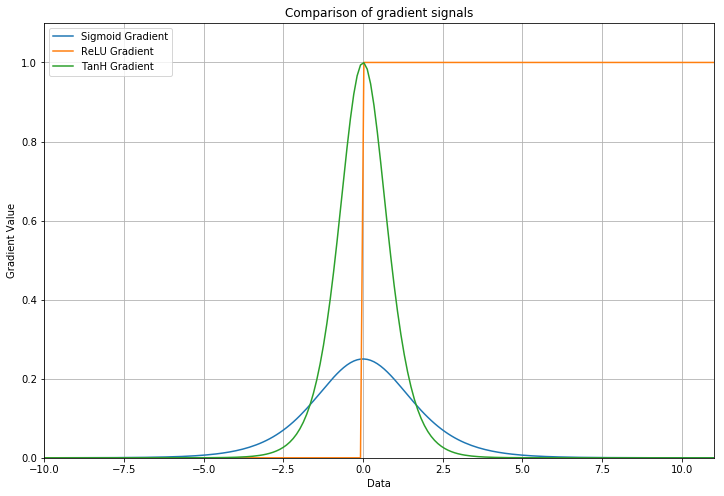

In [3]:
# TODO: implement plotting
data = np.linspace(-10.0, 11.0, 200)
print("DATA:",data)
sig_d = sigmoid(data)
relu_d = relu(data)
tanh_d = tanh(data)

sig_g = sigmoid_grad(sig_d)
relu_g = relu_grad(relu_d)
tanh_g = tanh_grad(tanh_d)

#print("ReLU-d:",relu_d)
#print ("Grad:",relu_grad(relu_d))

plt.plot(data, sig_g,label='Sigmoid Gradient')
plt.plot(data, relu_g,label='ReLU Gradient')
plt.plot(data, tanh_g,label='TanH Gradient')
plt.ylim((0, 1.1))
plt.xlim((-10.0,11.0))
plt.xlabel('Data')
plt.ylabel('Gradient Value')
plt.title('Comparison of gradient signals')
plt.legend()
plt.grid()

**iii**) What do you observe from the plot? (**0.5 points**) <br>
$\color{red}{Note}:$ In addition to your own explanation, your solution should include how the *gradient signal* of one activation function differs from the other, over this truncated domain.

(It is *very important* to understand how these *gradient signals* behave and how one differs from the other. This understanding will be useful for the task below, and also later on when we talk about *RNNs*)

$\color{violet}{Ans}$:
From the plot, we see the variation of the gradient values of the activation functions with respect to different variable values. The gradient signal of the ReLU signal is **zero** for values of x less than or equal to zero. For the value of x greater than 0, the value of the gradient is **one**. For the sigmoid and tanh signals, the value of the gradient signal is maximum at x=0, which is one for tanh and 0.25 for sigmoid. For other values, it exponentially decays. 
Hence, for sigmoid and tanh signals, for most values of x, the gradient value is a fraction and a small value. But of ReLU, the gradient signal is either 0 or 1. Hence for ReLU, even if we multiply multiple gradient signals, it can never really explode or become very small, it will always be zero or one.

**Points: 2.5/2.5**

# 1) Exploding/Vanishing Gradients (7.5 points)

In the lecture we've discussed some of the challenges in Neural Network Optimization. One among them is the so-called **Exploding/[Vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)** .

To be more specific, this problem happens only during the backward pass in training (very deep) Neural Networks.

**i**) Assume that you've a *100-layer* Feed Forward Neural Network with $sigmoid$ activation function as non-linearities. Explain mathematically why the *exploding or vanishing gradient problem* occurs only during the backward pass (and not during the forward pass) (**1 point**) .

$\color{green}{Hint}$: Think about what will happen to the *magnitude of gradient signal* when it reaches the first few layers (*i.e. layers near the input*), during *backpropagation*. The plot you did in *Preamble* section should also give you some intuition.


$\color{violet}{Ans}$:<br>

During the forward pass, we calculate the function of a function as we move through the layers. But during the backward pass, due to the application of chain rule, we calculate the product of the gradient of the present layer and the gradient of the layer after it(i.e to the right of it). Now if the activation function is sigmoid, it'll wrap the input and the output will be squashed between 0 and 1.

So during the forward pass of a neural network with a 100 layers, the input is squashed between 0 and 1 and the process is repeated at each neuron in each layer considering the weights and biases. Therefore, the output of each layer will be a number between 0 and 1 that is still comprehensible. Generally, this can be represented mathematically, by the following function $$ F(x) = f^{(100)}(f^{(99)}(...f^{(1)}(f^{(0)}(x)))$$ where $f^{(0)}(x)$ is the input layer, $f^{(1)}(x)$ is the $1^{st}$ hidden layer,$f^{(2)}(x)$ is the $2^{nd}$ hidden layer and similarly $f^{(3)}(x)$...$f^{(99)}(x)$ are all hidden layers and $f^{(100)}(x)$ is the ouput layer of the network. $f(x)$ is the sigmoid activation function.

But during the backward pass of the same neural network, the error is propagated backwards based on the chain rule as explained above. This process of using the chain rule involves taking the product of the gradients. Therefore, when we reach the 1st layer during the backward pass, the gradient calculation will involve taking the product of the gradient at layer 1 and the gradients of layers 2,3,4 ... 100. The gradient of the sigmoid function returns a fraction and when this fraction keeps getting multiplied with more fractions during the backward pass as described above, the product keeps getting smaller and smaller. This is because the gradient of the sigmoid function is in the range of 0 to 0.25 as seen in the plot from the Preamble section. So with a neural network of 100 layers, during the back propagation of the error, the gradient will become so small that it can be said that it vanishes.This can be represented mathematically for the input layer as follows: $$ F^{'}(x) = f^{'(0)}.f^{'(1)}...f^{'(99)}.f^{'(100)}$$ where $f^{'(100)}$ is the gradient at the $100^{th}$ layer(output layer), $f^{'(99)}$ is the gradient at the $99^{th}$ layer and so on.
As the gradient becomes smaller towards the earlier layers, those weights are updated at a much slower rate, as the values become smaller and smaller. <br>Hence the gradient values vanish to very small magnitudes, and because of this, the weight updation slows down as well.

**ii**) Explain how we can avoid the problem of gradient explosion. Your explanation should talk about what we do with the *norm of the gradient*. (**1 point**) <br>
$\color{green}{Hint}$: You can consult the [DL-book](http://www.deeplearningbook.org/) & TensorFlow API docs for more information; Also, we expect the formula and its explanation in your solution.

$\color{violet}{Ans}$: 
The problem of gradient explosion can be avoided by doing *gradient clipping*. In this method, we set a threshold limit. While propagating the error backwards, if the norm of the gradient goes above the threshold, the large step will not be taken. Instead, a smaller step in the direction indicated by the threshold is taken. The new smaller step will be equal to the gradient times the threshold divided by the norm of the gradient. All of this can be represented in the following manner:

if ||$f^{'}$|| > threshold  {                                                                                         
    $f^{'}$ = $f^{'}$ * threshold / ||$f^{'}$||
    }

##### iii) Vanishing Gradient Problem in Action (5.5 points)

In this part, you will implement a four layer FFN network in TensorFlow to (visually) understand the vanishing gradient problem.

In [4]:
# import libraries and data
import warnings
from sklearn.cross_validation import StratifiedShuffleSplit
from tensorflow.examples.tutorials.mnist import input_data

warnings.filterwarnings("ignore")

D:\Anaconda3\envs\nnia\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We'll be using MNIST dataset for this task, but not all 55K samples. Only a subset of 5K samples.

In [5]:
# read MNIST data
mnist = input_data.read_data_sets("data_MNIST/", one_hot=True)

Extracting data_MNIST/train-images-idx3-ubyte.gz
Extracting data_MNIST/train-labels-idx1-ubyte.gz
Extracting data_MNIST/t10k-images-idx3-ubyte.gz
Extracting data_MNIST/t10k-labels-idx1-ubyte.gz


In [6]:
# choose a subset of 5K samples (evenly distributed among all classes)

# extract zero-based indices of 1-hot locations in the array.
onehot_indices = [np.where(x==1)[0][0] for x in mnist.train.labels]
sss = StratifiedShuffleSplit(y=onehot_indices, n_iter=1, test_size=5000, random_state=0)

for _, subset_indices in sss:
    subset_images = mnist.train.images[subset_indices]
    subset_labels = mnist.train.labels[subset_indices]

In [7]:
# training set
train_images = subset_images
train_labels = subset_labels

print(train_images.shape)

(5000, 784)


Implement a *four layer FF Neural Network* in TensorFlow, with first hidden layer size 50, second hidden layer size 50, third hidden layer size 50 (i.e. 50 hidden units), and output layer size corresponding to the size of `num_labels`. Specifically, the network will be: `inputs->hidden1->hidden2->hidden3->output`

$\color{red}{Note}$: $\star$ Initialize the weight matrices using [Xavier initialization](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer). Biases can be initialized with [zeros](https://www.tensorflow.org/api_docs/python/tf/zeros). <br>
$\hspace{2em}$ $\star$ Use `tf.float32` for all tensors, for faster computation. <br>
$\hspace{2em}$ $\star$ Use **sigmoid activation** function as the non-linearity. <br>
$\hspace{2em}$ $\star$ Use $L_2$ regularization (i.e. weight decay) with alpha ($\alpha$) value of *1e-6*. See [tf-api](https://www.tensorflow.org/api_docs/python/tf/nn/l2_loss) for more details. <br>
$\hspace{2em}$ $\star$ Use *softmax cross entropy* as the loss function as in Assignment-5. (Note that, generally, this is used only during training time.)<br>
$\hspace{2em}$ $\star$ Use `Gradient Descent Optimizer` with learning rate of 0.5<br>
$\hspace{2em}$ $\star$ Here we are doing *batch training* (i.e. we use all 5K samples at once).<br>

$\color{green}{Hint}$: To understand how the *gradient magnitude (of weights)* changes during training, we need the gradients for the *weights*. Look into [tf-processing-gradients](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#processing_gradients_before_applying_them) for help.

With these in mind, now build the computation graph of our model below. (**1.5 points**)

In [8]:
# TODO: Implement
# hparams
# ---------
# parameter for regularization.
alpha = 1e-6

# learning rate
lr = 0.5
# Number of hidden units
n_hidden_units = 50
# ---------
# Number of labels we have
num_labels = train_labels.shape[1]

# Helper functions to build the computational graph

def linear_layer(input_shape, n_hidden_units, x):
    """
    Define a linear layer for your neural network.
    :param input_shape: The shape of the input for the layer. Be careful to consider that your data comes in batches. 
    :param n_hidden: The number of hidden units.
    :param x: The input to the layer.
    :return: A tuple where the first element is the linear combination of the input with the weights and the biases of the linear layer and the second element is the shape of the output matrix.
    """
    # x should be a tensor KEEP IN MIND
    shape = [input_shape[1], n_hidden_units]
    w = tf.get_variable("w", shape = shape, initializer = tf.contrib.layers.xavier_initializer(), dtype=tf.float32 )
    b = tf.get_variable("b", shape = [n_hidden_units], initializer = tf.random_normal_initializer, dtype=tf.float32)
    result = tf.matmul(x,w) + b
    return (result,[input_shape[0],n_hidden_units]) 

def sigmoid(x):
    """
    Define the sigmoid activation function.
    :param x: The input to the activation function.
    :return: The output of the activation function.
    """
    sigmoid_out = tf.sigmoid(x)
    return sigmoid_out

def softmax(x):
    """
    Define the softmax activation function.
    :param x: The input to the activation function.
    :return: The output of the activation function.
    """
    softmax_out = tf.nn.softmax(x)
    return softmax_out

def cross_entropy_loss(labels, unscaled_logits):
    """
    Define the cross entropy loss function between the true labels and the model predictions.
    :param labels: The true labels.
    :param unscaled_logits: The final activations produced by your model.
    :return: The loss value (a scalar).
    """
    out = tf.nn.softmax_cross_entropy_with_logits(labels = labels, logits = unscaled_logits)
    return tf.reduce_mean(out)

# TODO: implement the function below. This is where you build up your model architecture using the layers defined above.
def forward(x, input_shape):
    """
    Define the forward pass of your network. Be careful to consider that your data comes in batches.
    :param x: The input to your model.
    :param input_shape: The shape of the input.
    :return: The (unscaled) logit computed by the network.
    """
    with tf.variable_scope("hidden1"):
        (lin1,shape1) = linear_layer(input_shape, n_hidden_units, x)
        sig1 = sigmoid(lin1)
    with tf.variable_scope("hidden2"):
        (lin2,shape2) = linear_layer(shape1, n_hidden_units, sig1)
        sig2 = sigmoid(lin2)
    with tf.variable_scope("hidden3"):
        (lin3,shape3) = linear_layer(shape2, n_hidden_units, sig2)
        sig3 = sigmoid(lin3)
    with tf.variable_scope("outer"):
        (lin4,shape4) = linear_layer(shape3, num_labels, sig3)
    return lin4

def inference(unscaled_logits):
    """
    Define the predictions computed by your network
    :param unscaled_logits: The (unscaled) logit computed by the network.
    :return: The prediction of your model on input x.
    """
    return softmax(unscaled_logits)

def loss(x, y, input_shape):
    """
    Define the loss between the prediction of your model and the actual label.
    :param x: The input to your model.
    :param y: 
    :param input_shape: The shape of the input.
    :return: The loss between what your model predicts and the true label.
    """
    out1 = forward(x, input_shape)
    # Calculating cross entropy loss
    calc_loss = cross_entropy_loss(y, out1)
    # Calculating the regularization loss
    layers = ["hidden1","hidden2","hidden3","outer"]
    reg_loss = 0
    for layer in layers:
        with tf.variable_scope(layer,reuse=True):
            w = tf.get_variable("w", dtype=tf.float32 )
            reg_loss += tf.nn.l2_loss(w)
    reg_loss *= alpha
    size = tf.shape(input_shape,out_type=tf.float32)[0]
    # Combining the two losses
    reg_loss = reg_loss / size
    total_loss = calc_loss + reg_loss
    #
    return (total_loss)


# TODO: Implement
batch_size = 5000

# Defining the computational graph for our 4 layer FF neural network.

input_shape = (batch_size, train_images.shape[1])
output_shape = (batch_size, train_labels.shape[1])

inputs = tf.placeholder(tf.float32, shape = input_shape)
outputs = tf.placeholder(tf.float32, shape = output_shape)

with tf.variable_scope("inits") as scope:
    try:
        final_activation = forward(inputs, (tf.shape(inputs)[0],input_shape[1]));
        predictions = inference(final_activation);
        scope.reuse_variables()
        nw_loss = loss(inputs, outputs, (tf.shape(inputs)[0],input_shape[1]));
    except ValueError:
        scope.reuse_variables();
        final_activation = forward(inputs, (tf.shape(inputs)[0],input_shape[1]));
        predictions = inference(final_activation);
        nw_loss = loss(inputs, outputs, (tf.shape(inputs)[0],input_shape[1]));
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(lr)
with tf.variable_scope("inits",reuse=True):
    grads_w = optimizer.compute_gradients(nw_loss, var_list=[tf.get_variable("hidden1/w"),tf.get_variable("hidden2/w"),tf.get_variable("hidden3/w"),tf.get_variable("outer/w")])
    grads_b = optimizer.compute_gradients(nw_loss, var_list=[tf.get_variable("hidden1/b"),tf.get_variable("hidden2/b"),tf.get_variable("hidden3/b"),tf.get_variable("outer/b")])

Implement the function below which computes accuracy. (**0.5 points**)

In [9]:
# TODO: Implement
def compute_accuracy(predictions, ground_truth):
    """
    compute & return accuracy (in percentage).
    predictions: predictions from the network
    ground_truth: 1-hot array of ground truth labels
    """
    preds = np.array(predictions)
    lab_preds = np.argmax(preds,axis=1)
    lab_truth = np.argmax(ground_truth, axis=1)
    corr = 0
    for i in range(len(preds)):
        if lab_preds[i] == lab_truth[i]:
            corr += 1
    acc = (corr / len(preds)) * 100
    return acc

Implement code which performs network training (with `num_steps = 3001`). (**1.5 point**) <br>
$\color{green}{Hint}$: To understand how the *gradient magnitude (of weights)* (i.e. their absolute values) changes across layers and with each of the 3K steps, we need to cache the *mean of absolute value of gradients (of weights)* of all 4 layers in each step of the total 3K steps. We'll need these gradients for plotting later on.

In [10]:
def shuffle_train_data(X_train, Y_train):
    """called after each epoch"""
    perm = np.random.permutation(train_labels.shape[0])
    #idx = self.r.permutation(train_labels.shape[0])
    #X_data, y_enc = X_data[idx], y_enc[:, idx]
    Xtr_shuf = X_train[perm]
    Ytr_shuf = Y_train[perm]
    
    return Xtr_shuf, Ytr_shuf
# TODO: implement network training
# 
epochs = 3001
n = train_images.shape[0]
means = None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        #print("Epoch:",epoch+1)
        Xtr_shuf, Ytr_shuf = shuffle_train_data(train_images, train_labels)
        grads = None
        grads = sess.run(grads_w, feed_dict={inputs:Xtr_shuf,outputs:Ytr_shuf})
        sess.run(optimizer.apply_gradients(grads_w), feed_dict={inputs:Xtr_shuf,outputs:Ytr_shuf})
        sess.run(optimizer.apply_gradients(grads_b), feed_dict={inputs:Xtr_shuf,outputs:Ytr_shuf})
        # TODO: cache the mean of absolute value of gradients
        for i in range(len(grads)):
            g = grads[i][0].flatten()
            m = np.mean(np.absolute(g))
            if means is None:
                means = [None for _ in range(len(grads))]
        
            if means[i] is None:
                means[i] = [m]
            else:
                means[i].append(m)
        # TODO: print stats for every 100 steps
        if epoch % 100 == 0:
            print("Epoch:",epoch)
            calc_loss = sess.run(nw_loss,feed_dict={inputs:Xtr_shuf,outputs:Ytr_shuf})
            print("N/W Loss:", calc_loss)
            preds = sess.run(predictions,feed_dict={inputs:Xtr_shuf})
            print("Accuracy:", compute_accuracy(preds, Ytr_shuf))
    

Epoch: 0
N/W Loss: 2.50968
Accuracy: 9.94
Epoch: 100
N/W Loss: 2.2894
Accuracy: 11.24
Epoch: 200
N/W Loss: 2.2096
Accuracy: 30.880000000000003
Epoch: 300
N/W Loss: 1.54362
Accuracy: 55.800000000000004
Epoch: 400
N/W Loss: 0.953957
Accuracy: 70.8
Epoch: 500
N/W Loss: 0.742935
Accuracy: 77.64
Epoch: 600
N/W Loss: 0.606889
Accuracy: 83.34
Epoch: 700
N/W Loss: 0.492735
Accuracy: 87.08
Epoch: 800
N/W Loss: 0.406034
Accuracy: 89.48
Epoch: 900
N/W Loss: 0.341006
Accuracy: 91.16
Epoch: 1000
N/W Loss: 0.289998
Accuracy: 92.62
Epoch: 1100
N/W Loss: 0.247872
Accuracy: 93.88
Epoch: 1200
N/W Loss: 0.211927
Accuracy: 94.67999999999999
Epoch: 1300
N/W Loss: 0.181121
Accuracy: 95.66
Epoch: 1400
N/W Loss: 0.155025
Accuracy: 96.52
Epoch: 1500
N/W Loss: 0.133061
Accuracy: 97.26
Epoch: 1600
N/W Loss: 0.114518
Accuracy: 97.76
Epoch: 1700
N/W Loss: 0.0987806
Accuracy: 98.3
Epoch: 1800
N/W Loss: 0.0853819
Accuracy: 98.6
Epoch: 1900
N/W Loss: 0.0739494
Accuracy: 98.86
Epoch: 2000
N/W Loss: 0.0641604
Accuracy:

Train the network for 3K steps. Print the *loss* and *training accuracy* after every 100 steps. <br> (This will be helpful as a sanity check for your implementation and also for the later analysis question) <br>
$\color{green}{Hint}$: If you implement it correctly, and train it for 3K steps with the provided hyperparameters, the execution time on a 4GB machine would be *ca. 12 mins*, and the *training accuracy* would be around 99.9%. Also, here we're doing only training; i.e. no validation and testing.

**iv**) **Plotting**

Now, plot the value of gradient magnitudes of all 4 layers, overlaid in a single plot. (**1 point**) <br>
$\color{green}{Hint}$: Your $x-axis$ should be $\#steps$ and $y-axis$ should have the *mean value of gradient magnitudes (of weights)* corresponding to all 4 layers.

$\color{red}{Note}$: The important part of this exercise is the plot that explains the *vanishing gradient problem* and the observations that you make out of it.

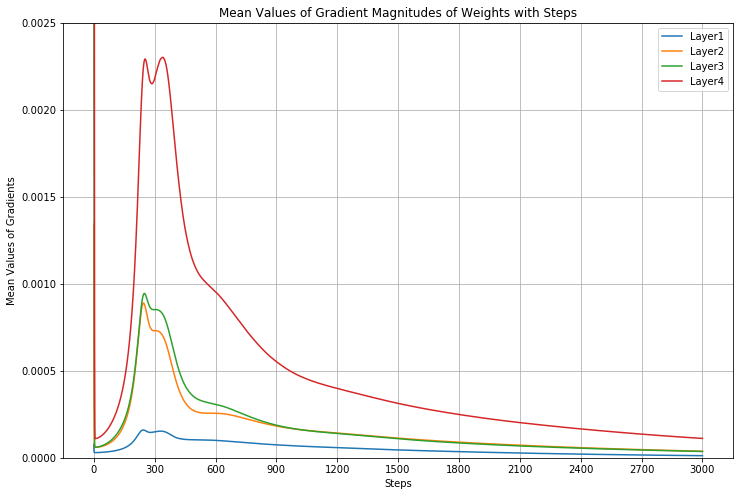

In [26]:
# TODO: implement plotting
#
# 
x = range(epochs)
plt.plot(x, means[0], label='Layer1')
plt.plot(x, means[1], label='Layer2')
plt.plot(x, means[2], label='Layer3')
plt.plot(x, means[3], label='Layer4')
plt.ylim((0.0,0.0025))
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Mean Values of Gradients')
plt.title('Mean Values of Gradient Magnitudes of Weights with Steps')
plt.xticks(np.arange(0,3001,300))
plt.grid()
plt.show()

Q1) What are your observations from the above plot? How does the *flow of gradient signal* through different layers changes with the increase in number of steps (during training)? (**0.5 points**)

$\color{violet}{Ans}$:
From the plot we can see that the flow of gradient values first increase to a particular level, and then decreases exponentially with the number of steps we perform our training. For the last layer, this change is much more prominent, for the middle layers, much less so, and for the 1st layer, it is **very** less. So, for the last layer, the gradient changes very quickly, in the middle layers moderately, whereas in the first layer, the change in the gradient values is **nominally** small. In the first few layers, the gradient values almost remain same throughout, without changing. This is especially evident for the first layer. 

Q2) Now, analyze the *training accuracy & loss values* from the stats of the whole training loop. At the same time (in parallel), observe from the plot how the gradient signal(magnitude) changes across layers as the steps increase. *Relate these two observations* and explain your findings. (**0.5 points**) <br>

$\color{violet}{Ans}$:
From the plot we clearly see that the gradient signals became very large at around 300-400 steps. Previous to this it was small, and later to this, the signal exponentially decays. It changes much more quickly for the outer layer, and is very **nominal** for the first layer. This shows the vanishing gradient problem, where the first layer is learning very slowly. The gradient values become very small, and as a result do not change as quickly as the latter layers. 
At the same time, if we track the loss and accuracy of our model, we see that at around 300th step, the accuracy jumped from around 30% to 55%. Again at 300 to 400th step, the accuracy change from 55% to around 70%. The loss also changed from 2.2 to 1.54, and from 1.54 to 0.95, which are much larger changes compared to the other steps. This is reflected by the high value of the gradient signals. It shows that the network was *learning much more quickly* at that instant. After that, the gradient signals decay, and we also see that the accuracy value and the loss value do not change that quickly as it did at that instant.

**Points: 7.5/7.5 **

# 2) Understanding Optimization Algorithms (10 points)

### Optimization algorithms for Deep Neural Networks

In this task, you will study and understand various optimization methods such as *Vanilla Gradient Descent, Gradient Descent with Momentum, AdaGrad, Adam, and RMSProp*. <br>
For a terse & high level overview of these algorithms, see here: [SGD-variants](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Extensions_and_variants)

$\color{red}{Note}$: Adam was *not introduced* in the lecture but it's an important algorithm to know, particularly for NLP & Computer Vision problems. Refer [section 8.5.3](http://www.deeplearningbook.org/contents/optimization.html) for details. <br>

#### 1) Stochastic Gradient Descent (SGD) Optimizer (2 points)

i) Is it important to use *learning rate decay* for (mini-batch) SGD based learning? Justify. (**0.5 + 1 points**) <br>
ii) What is the advantage of using a *small batch size* during training instead of the *full set of examples at once* in the training data? (**0.5 points**)

$\color{violet}{Ans}$:

i) Yes, it is important to use *learning rate decay* for (mini-batch) SGD based learning. The primary reason is that SGD **introduces a source of noise** by randomly sampling the training data. This noise may not vanish even if we reach the proper minimum. Also, if we have a static learning rate, we might have a problem of setting it too high or too low. Setting it too high, the optimization algorithm might not converge, and it might go into some unoptimal space of our function. If we set it too low, we would slow down our optimization process as we would have a very slow convergence. Instead, if we use *learning rate decay* for (mini-batch) SGD based learning, then we can start with a large enough learning rate, and gradually lower it. By doing so, we would initially use bigger steps, and the nearer we go towards the optimal region, we lower the rate, so we take smaller steps which ensures proper convergence. Hence, this technique ensures a faster, yet proper convergence to a minimum value. Hence *learning rate decay* is an important thing to use with SGD based learning systems.

ii) Using small batch size is a compromise between computing the true gradient and the gradient at a single sample. Would the update be done for the full set at once, this would result in a much slower computation and greater memory requirement. At the same time, it might land us at a non-optimal point *(saddle point)*. By doing the update for a mini-batch, we compute each step for a small subset of samples. This leads to less memory requirements, and we add *noise* to our gradient descent, which might actually help us *escape* a non-optimal local critical region, and allow us to converge more efficiently to a better region. The disadvantage is that we have to go through our entire data-set multiple times to find an optimal solution.

#### 2) Momentum Optimizer (2 points)

Familiarize yourself with the algorithm from the lecture slide and [DL book](http://www.deeplearningbook.org/contents/optimization.html) and understand how it works.<br>
i) Now describe, in what way Momentum method is different from *vanilla SGD*? (**1 point**)

ii) It is known that the cost function of NNs usually has many saddle points. How does momentum method help to alleviate the problem of getting stuck in these saddle points when compared to vanilla SGD? (**1 point**) <br>
$\color{red}{Note}$: You can assume that, in both cases, we start at the same initial point.

$\color{violet}{Ans}$:

i) Momentum method is different form vanilla SGD because it takes the past gradients into account. This is done by defining a variable v (velocity), which represents an exponentially decaying moving average of the negative gradient. For an update of the parameters, the current gradient and the weighted velocity is taken into account. So the momentum is kind of working like a filter, that prevents drastic changes in the movement, by smoothing the path towards the minimum. Momentum prevents the oscillations we may see in a poorly conditioned SGD learning system in a narrow canyon like region. Momentum correctly traverses it length-wise. Momentum also accelerates learning in the face of very high curvature, small or noisy gradients as well. In vanilla SGD, the step we take depends only on the current gradient. But, in momentum optimizer, we use the sequence of previous gradients as well. So, our step is going to depend on how large the previous steps were, and how similarly aligned they are. The step we take will be maximal when many consecutive gradients point in exactly same direction, hence higher momentum.

ii) At a saddle point, the gradient is zero, but as said above, the update step is defined via the current gradient and the velocity and if the algorithem didn't start at a saddle point, then it must have somehow gotten there, so the velocity at the saddle point isn't zero. As a result, because momentum uses the previous gradient values, we will not get stuck at saddle points, but we can now go over them. Whereas, for vanilla SGD, it will start oscillating at that point, and may get stuck. Momentum will see that the gradient direction is getting reversed at each step, so it will not update in that direction and will slow down, and use the previous direction, which also allows it to update parameters quickly and move along a narrow canyon quickly, as compared to SGD. The updated parameters for Momentum will differ from the current ones and the algorithm won't get stuck.

#### 3) AdaGrad optimizer (2 points)

Further reading: [Adaptive SubGradient Methods for Stochastic Optimization](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)

$\color{red}{Note}$: An important algorithm for NN training for NLP and CV problems.

Refer the slides and the [DL book](http://www.deeplearningbook.org/contents/optimization.html) and understand how AdaGrad algorithm works.  <br>
i) Describe the basic idea behind AdaGrad algorithm. (**1 point**) <br>
ii) What is the disadvantage of this algorithm, in practice? (**0.5 points**)<br>
iii) What is the important property of this algorithm? (**0.5 points**)

$\color{violet}{Ans}$:  <br>
<br>
i) The AdaGrad optimizer individually scales down the the learning rate of each of the parameters. The parameters with a big partial derivative have a rapid decrease in their learning rates, whereas parameters with a small partial derivative only have a small decrease of their learning rate. This works via scaling the learning rates with the inverse of the square root of the sum of all the past squared gradients (derivatives).

ii) The algorithm has the disadvantage, that it can result in a premature and excessive decrease in the learning rate due to the accumulation of squared gradients from the beginning of training. Since every added term to the accumulated value is positive, the accumulated sum keeps growing during training. This in turn causes the learning rate to shrink and eventually become infinitesimally small, at which point the algorithm is no longer able to acquire additional knowledge.

iii) The important property is, this algorithm works especially well for gradient vectors that are sparse. Also, AdaGrad is designed to converge rapidly when applied to a *convex function*. Gradient vectors that have sparse components will have high learning rate to converge much more quickly compared to other components, which will converge as required. AdaGrad unfortunately doesn't perform well in all deep lerrning models, but in some.

##### 4) RMSProp optimizer (2 points)

i) How does RMSProp differ from AdaGrad?  (**1 point**) <br>
ii) What disadvantage(s) in AdaGrad are solved by RMSProp? Explain it using the formula. (**1 point**)

$\color{violet}{Ans}$:  <br>

i) RMSProp is quite similiar to AdaGRad, it just changes the gradient accumulation into an exponentially weighted moving average. Therefore it performs much better in a non-convex setting. Thus, we no longer depend too much on the value of the gradient values that are from a long time before due to the exponential decaying.

ii) Accumultion of the squared gradient 

in AdaGrad: $ r_{1} = r_{0} + g\odot g$

in RMSProp: $ r_{1} = \rho r_{0} + (1-\rho)g\odot g$

AdaGrad is designed to converge quickly in a convex region. But if we face a non-convex region first, and then later on enter a convex bowl region, AdaGrad may have already reduced the learning rate too much due to the accumulated sum of squared previous gradients. So, by the time we enter the convex region, the learning rate is too low to update properly.
The disadvantage, of AdaGrad, decreasing the learning rate too much because of past gradients, is fixed in RMSProp by introducing the factor $\rho$. By choosing $\rho$ small, the current gradient gets more weight than the past (eventually big) ones. Therefore the learning rate can stay big enough to converge rapidly after finding the convex bowl. It would work as if we are initializing the AdaGrad optimizer *after* entering the convex bowl region.

#### 5) Adam Optimizer (2 points)

Further reading: [ADAM: A Method for Stochastic Optimization](https://arxiv.org/pdf/1412.6980.pdf)

$\color{red}{Note}$: Adam was *not introduced* in the lecture but it's an important algorithm to know, particularly for NLP & Computer Vision problems. Refer [section 8.5.3](http://www.deeplearningbook.org/contents/optimization.html) for details. <br>

i) Is there any similarity between RMSProp and Momentum? Is it possible to combine them? (**1 point**)

ii) Describe the way in which Adam algorithm performs parameter update.<br>
What are the advantage(s) of such an update rule when compared to RMSProp (with momentum)? (**1 point**)

$\color{violet}{Ans}$:  <br>

i)  There is a similarity between RMSProp and Momentum. In both algorithms, past gradients are taken into accound and in both algorithms the amount past gradients that are taken into account can be adjusted (via decay rate $\rho$ in RMSProp and via momentum parameter $\alpha$ in Momentum). Yes we can combine the velocity concept of Momentum, and the rescaling concept of RMSProp. We can actually combine them to get a method of RMSProp with momentum. The Adam optimizer might also be considered to be the combination of those two concepts but with some important differences. 

ii) The first step after calculating the gradient, is the calculation of the first (mean) and second order moment (variance). The calculation of the second order moment is equal to the accumulation of the squared gradient as in RMSProp. The calculation of the first moment just differs by using a different $\rho$ and only the gradient, instead of the squared gradient. The calculation of the first moment is very similar to the velocity and momentum concept. After that, each moment is multiplied with the factor $\frac{1}{1-{\rho_{1}}^t}$ or $\frac{1}{1-{\rho_{2}}^t}$ with $t$ as time step (correction of the bias). That means the factor gets closer to 1 (smaller over time) with each step, because the values of the rhos lie between zero and one. The update is computed by multiplying the step size with the first corrected momentum, divided by the square root of the second momentum (small constant ommited). The advantage of Adam compared to RMSProp is, that the second-order moment estimate in Adam doesn't have such a high bias in early training as RMSProp might have. Even if we have RMSProp with momentum, it **does not** handle the correction of the calculation of the *second moment* of the gradient. RMSProp simply calculates the second moment, and uses it to rescale. Adam takes care of this, by **correction** of bias of both the first *and* second moments, then using these moments to rescale. This results in Adam not having a very high bias early on.

**Points: 10/10**

# Christmas Bonus (1 point)

Where and how could you apply a deep neural network for ensuring safety of humans during Christmas & New Year celebrations?

$\color{violet}{Ans}$:  <br>We could apply deep neural network on video surveillance happening at public places during the holiday time to detect
people showing abnormal behavior with respect to the crowd, and maybe detecting weapons which could raise alarms.

**Points: 1.0/1.0 **

-----------------------------------------------------------------------------------------------

# $\color{red}{\star \star We\hspace{0.5em}Wish\hspace{0.5em}You\hspace{0.5em}a\hspace{0.5em}Merry\hspace{0.5em}Christmas! \star \star} $ $\color{violet}{\&}$ $\color{green}{Happy\hspace{0.5em}New\hspace{0.5em}Year!} $ - NNIA Team

### Total Points: 21/20

--------------------------------------------------------------------------

## Submission instructions
You should provide a single Jupyter notebook as the solution. The naming should include the assignment number and matriculation IDs of all members in your team in the following format:
**assignment-8_matriculation1_matriculation2_matriculation3.ipynb** (in case of 3 members in a team). 
Make sure to keep the order matriculation1_matriculation2_matriculation3 the same for all assignments.

Please submit the solution to your tutor (with **[NNIA][assignment-8]** in email subject):
1. Maksym Andriushchenko <s8mmandr@stud.uni-saarland.de>
2. Marius Mosbach <s9msmosb@stud.uni-saarland.de>
3. Marimuthu Kalimuthu <s8makali@stud.uni-saarland.de>
4. Rajarshi Biswas <rbisw17@gmail.com>

Note :  **If you are in a team, you should submit only 1 solution to only 1 tutor.** <br>
$\hspace{2em}$ **Submissions violating these rules will not be graded.**